In [101]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import torch

import os 

In [102]:
path = "C:\\Users\\pc\\Desktop\\tp arki ann\\Shoe vs Sandal vs Boot Dataset"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' C:\Users\pc\Desktop\tp arki ann\Shoe vs Sandal vs Boot Dataset ' :
['Boot', 'Sandal', 'Shoe']


In [103]:
all = []

for file in dir_list:
    for i in range(1,5001):
        all.append(cv.imread(f"Shoe vs Sandal vs Boot Dataset/{file}/{file} ({i}).jpg", cv.IMREAD_COLOR))

In [104]:
len(all)

15000

In [105]:
a = all[1].shape
for i, img in enumerate(all):
    if img.shape != a:
        print(img.shape, i)
        a = img.shape

(102, 135, 3) 5027
(102, 136, 3) 5028
(102, 135, 3) 5090
(102, 136, 3) 5091


In [106]:
for i, img in enumerate(all):
    if img.shape != (102, 136, 3):
        all.pop(i)

In [107]:
len(all)

14998

In [108]:
all = np.array(all)

# label creation and split the data 

In [109]:
labels = np.concatenate([np.zeros(5000), np.ones(4998), 2*np.ones(5000)])

X_train, X_test, y_train, y_test = train_test_split(
    all, labels, test_size=1/3, shuffle=True, stratify=labels)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the input shape
input_shape = (102, 136, 3)
num_classes = 3

# Build the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 134, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 67, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 65, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 49152)             0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [44]:
# Assuming you have prepared your data and have X_train, y_train, X_val, y_val

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test_one_hot)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train_one_hot)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/10
313/313 [==============================] - 56s 178ms/step - loss: 12.7598 - accuracy: 0.8435 - val_loss: 0.3154 - val_accuracy: 0.8838
Epoch 2/10
313/313 [==============================] - 54s 172ms/step - loss: 0.2233 - accuracy: 0.9219 - val_loss: 0.4597 - val_accuracy: 0.8374
Epoch 3/10
313/313 [==============================] - 54s 173ms/step - loss: 0.2561 - accuracy: 0.9074 - val_loss: 0.2265 - val_accuracy: 0.9300
Epoch 4/10
313/313 [==============================] - 56s 178ms/step - loss: 0.1159 - accuracy: 0.9590 - val_loss: 0.2740 - val_accuracy: 0.9162
Epoch 5/10
313/313 [==============================] - 54s 172ms/step - loss: 0.0817 - accuracy: 0.9693 - val_loss: 0.2424 - val_accuracy: 0.9378
Epoch 6/10
313/313 [==============================] - 54s 173ms/step - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.3131 - val_accuracy: 0.9292
Epoch 7/10
313/313 [==============================] - 54s 173ms/step - loss: 0.1623 - accuracy: 0.9462 - val_loss: 0.2989 - val_a

In [45]:
loss, accuracy = model.evaluate(X_train, y_train_one_hot)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

313/313 [==============================] - 12s 37ms/step - loss: 0.0584 - accuracy: 0.9782
Validation Loss: 0.0584
Validation Accuracy: 0.9782


In [46]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

157/157 [==============================] - 6s 38ms/step - loss: 0.2441 - accuracy: 0.9304
Validation Loss: 0.2441
Validation Accuracy: 0.9304


# model 01

In [48]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the input shape
input_shape = (102, 136, 3)
num_classes = 3

# Build the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 134, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 98, 132, 32)       9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 66, 32)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 49, 66, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 64, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 62, 64)        36928     
                                                      

In [49]:
# Assuming you have prepared your data and have X_train, y_train, X_val, y_val

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test_one_hot)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train_one_hot)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/10
313/313 [==============================] - 188s 596ms/step - loss: 5.0648 - accuracy: 0.8056 - val_loss: 0.2919 - val_accuracy: 0.9034
Epoch 2/10
313/313 [==============================] - 175s 560ms/step - loss: 0.2672 - accuracy: 0.9028 - val_loss: 0.2020 - val_accuracy: 0.9304
Epoch 3/10
313/313 [==============================] - 176s 562ms/step - loss: 0.1866 - accuracy: 0.9345 - val_loss: 0.1344 - val_accuracy: 0.9554
Epoch 4/10
313/313 [==============================] - 175s 560ms/step - loss: 0.1475 - accuracy: 0.9480 - val_loss: 0.1470 - val_accuracy: 0.9518
Epoch 5/10
313/313 [==============================] - 181s 578ms/step - loss: 0.1150 - accuracy: 0.9593 - val_loss: 0.1282 - val_accuracy: 0.9588
Epoch 6/10
313/313 [==============================] - 178s 567ms/step - loss: 0.0948 - accuracy: 0.9666 - val_loss: 0.1128 - val_accuracy: 0.9644
Epoch 7/10
313/313 [==============================] - 174s 556ms/step - loss: 0.0805 - accuracy: 0.9736 - val_loss: 0.1104 -

In [50]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"test Loss: {loss:.4f}")
print(f"test Accuracy: {accuracy:.4f}")

157/157 [==============================] - 15s 94ms/step - loss: 0.0943 - accuracy: 0.9678
Validation Loss: 0.0943
Validation Accuracy: 0.9678


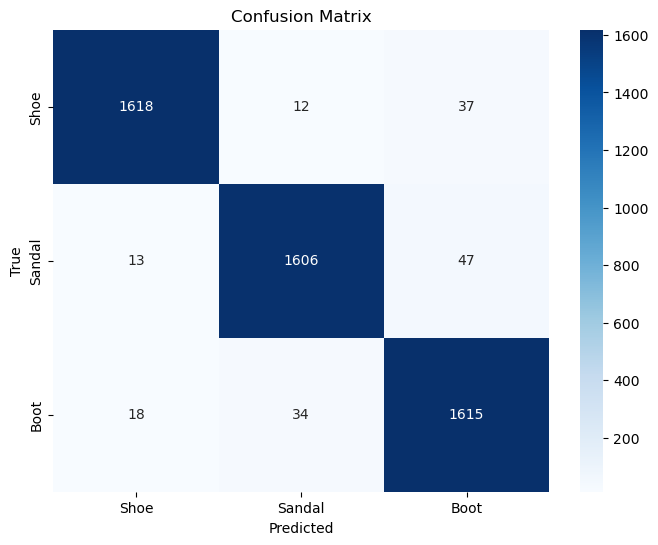

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# true and predicted labels
y_pred = model.predict(X_test)

ypred  = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    ypred[i] = np.argmax(y_pred[i])


# Calculate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Define the class labels
class_labels = ['Shoe', 'Sandal', 'Boot']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
ypred.shape

(5000,)

# model2

In [110]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the input shape
input_shape = (102, 136, 3)
num_classes = 3

# Build the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 100, 134, 32)      896       
                                                                 
 conv2d_23 (Conv2D)          (None, 98, 132, 32)       9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 66, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 49, 66, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 47, 64, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 62, 64)        36928     
                                                     

In [111]:
# Assuming you have prepared your data and have X_train, y_train, X_val, y_val

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=32,
    epochs=10
)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train_one_hot)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/10
313/313 [==============================] - 201s 638ms/step - loss: 4.4226 - accuracy: 0.8232
Epoch 2/10
313/313 [==============================] - 226s 723ms/step - loss: 0.1947 - accuracy: 0.9313
Epoch 3/10
313/313 [==============================] - 228s 728ms/step - loss: 0.1407 - accuracy: 0.9498
Epoch 4/10
313/313 [==============================] - 224s 715ms/step - loss: 0.1181 - accuracy: 0.9582
Epoch 5/10
313/313 [==============================] - 231s 738ms/step - loss: 0.0887 - accuracy: 0.9685
Epoch 6/10
313/313 [==============================] - 231s 737ms/step - loss: 0.0699 - accuracy: 0.9747
Epoch 7/10
313/313 [==============================] - 230s 735ms/step - loss: 0.0678 - accuracy: 0.9772
Epoch 8/10
313/313 [==============================] - 4677s 15s/step - loss: 0.0538 - accuracy: 0.9821
Epoch 9/10
313/313 [==============================] - 194s 620ms/step - loss: 0.0551 - accuracy: 0.9821
Epoch 10/10
313/313 [==============================] - 44s 139ms/

In [112]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"test Loss: {loss:.4f}")
print(f"test Accuracy: {accuracy:.4f}")

157/157 [==============================] - 21s 131ms/step - loss: 0.1269 - accuracy: 0.9632
test Loss: 0.1269
test Accuracy: 0.9632


157/157 [==============================] - 23s 146ms/step


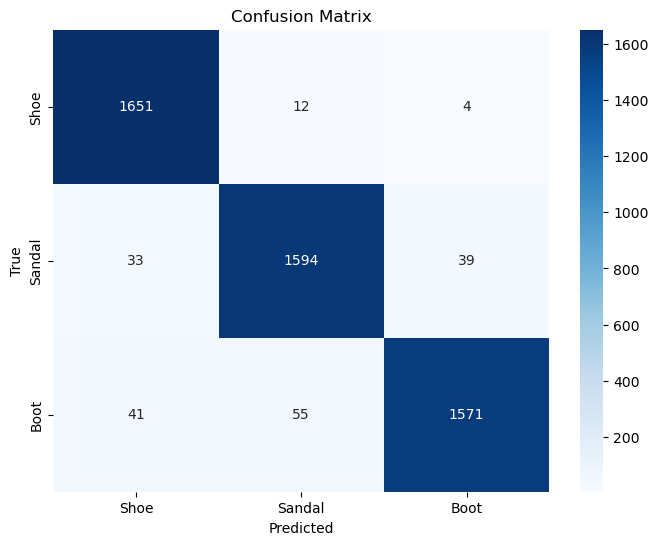

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# true and predicted labels
y_pred = model.predict(X_test)

ypred  = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    ypred[i] = np.argmax(y_pred[i])


# Calculate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Define the class labels
class_labels = ['Shoe', 'Sandal', 'Boot']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()